In [1]:
import sys
import importlib
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))

# Now import modular code
from src.data_loader import load_data
from src.data_loader import preprocess
from src.utils.helpers import summarize_loss_ratio
from src.eda.eda_utils import plot_numerical_distributions, plot_categorical_distributions, analyze_monthly_changes_by_zip, plot_geographic_trends, plot_boxplots_for_numerical, plot_loss_ratio_by_province, plot_claims_by_vehicle_make, plot_monthly_claim_trends
importlib.reload(load_data)

<module 'src.data_loader.load_data' from 'C:\\Users\\pc\\Desktop\\KAIM\\insurance-risk-analytics-w3\\src\\data_loader\\load_data.py'>

In [2]:
# Load data
df = load_data.load_portfolio_data("../data/MachineLearningRating_v3.txt")

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\data_loader\load_data.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|", parse_dates=['TransactionMonth'])


#### Data Overview

In [3]:
df.info()  #Dataset Info
display(df.describe())   #Descriptive Statistics (Numerical Columns)
display(df.describe(include='object')) #Descriptive Statistics (Categorical Columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
count,1000098,1000098,1000098,1000098,854137,959866,991839,990562,1000098,1000098,...,698,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,4,6,5,1,11,3,3,3,1,9,...,1,2,13,28,22,14,5,4,1,1
top,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,No,Monthly,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
freq,895210,911929,933555,1000098,260811,597938,986208,940990,1000098,393865,...,698,999554,791235,104158,104183,824124,828125,915028,1000098,1000098


In [4]:
# Preview unique values for key categorical fields
categorical_columns = ['Province', 'Gender', 'ItemType', 'Language', 'Bank']
load_data.preview_top_categorical_values(df, categorical_columns)


Top 10 values in 'Province':
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

Top 10 values in 'Gender':
Gender
Not specified    940990
Male              42817
NaN                9536
Female             6755
Name: count, dtype: int64

Top 10 values in 'ItemType':
ItemType
Mobility - Motor    1000098
Name: count, dtype: int64

Top 10 values in 'Language':
Language
English    1000098
Name: count, dtype: int64

Top 10 values in 'Bank':
Bank
First National Bank    260811
ABSA Bank              204954
Standard Bank          181715
NaN                    145961
Nedbank                132003
Capitec Bank            58155
RMB Private Bank        12576
Ithala Bank              1730
Investec Bank             732
Old Mutual                688
Name: count, dtype: int64


#### Data Quality Assessment

In [5]:
missing_summary = load_data.summarize_missing_values(df, threshold=0.0)
display(missing_summary)

,missing_count,missing_percent
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Rebuilt,641901,64.183810
Converted,641901,64.183810
WrittenOff,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


In [6]:
# Drop columns that are completely missing
df.dropna(axis=1, how='all', inplace=True)

#### Univariate Analysis

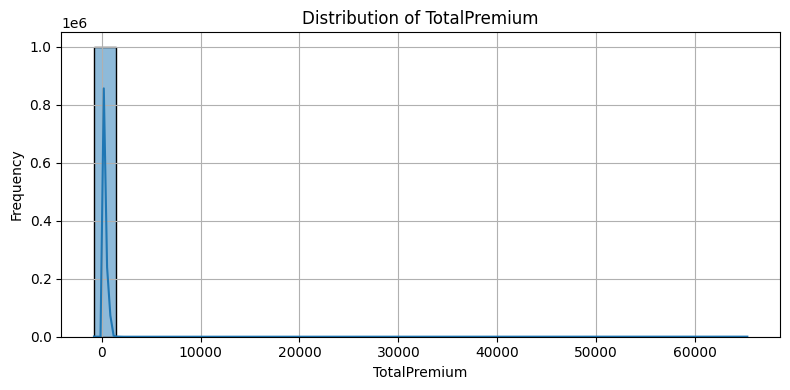

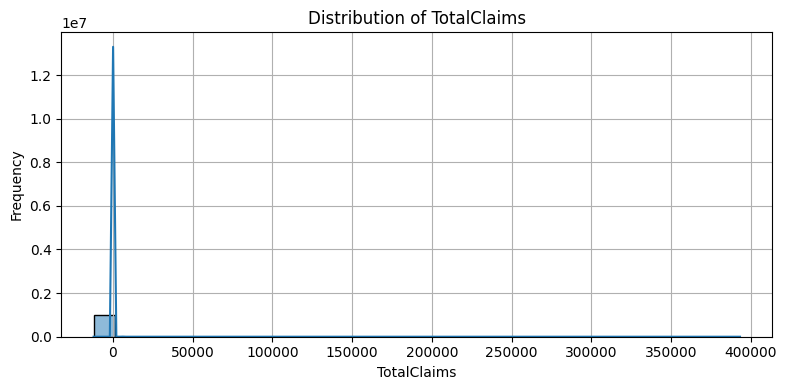

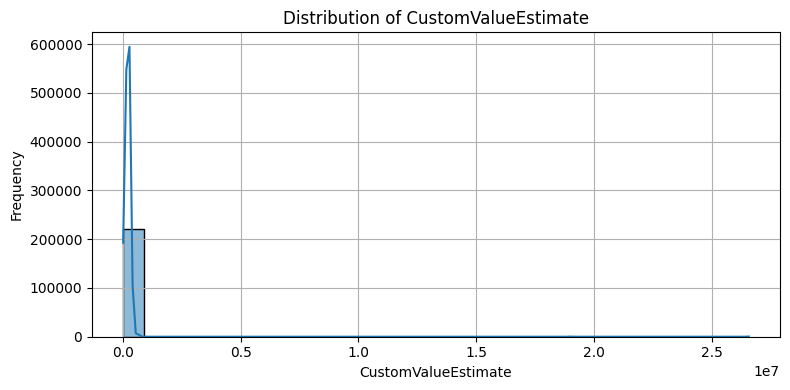

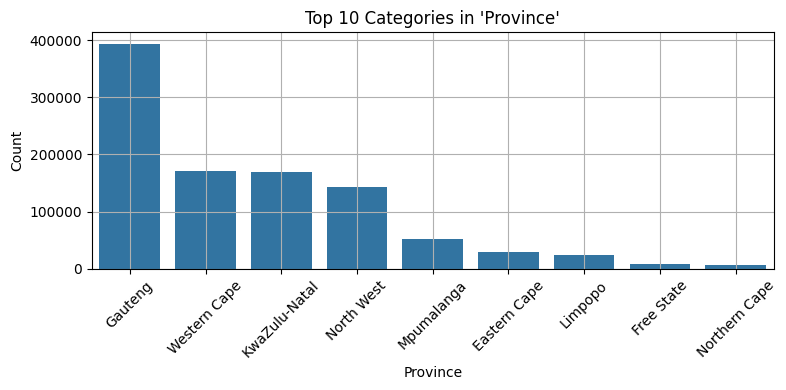

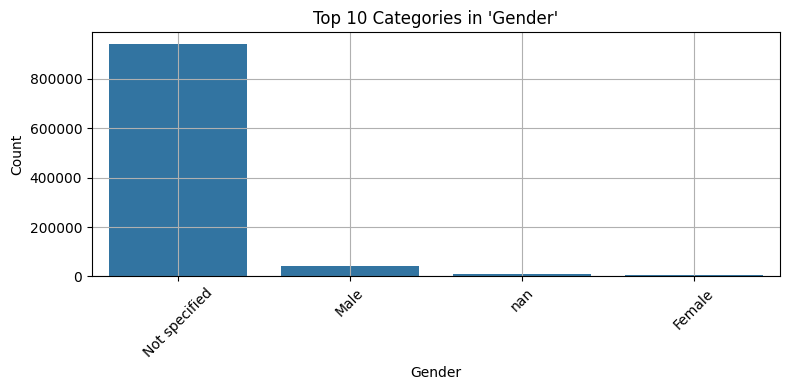

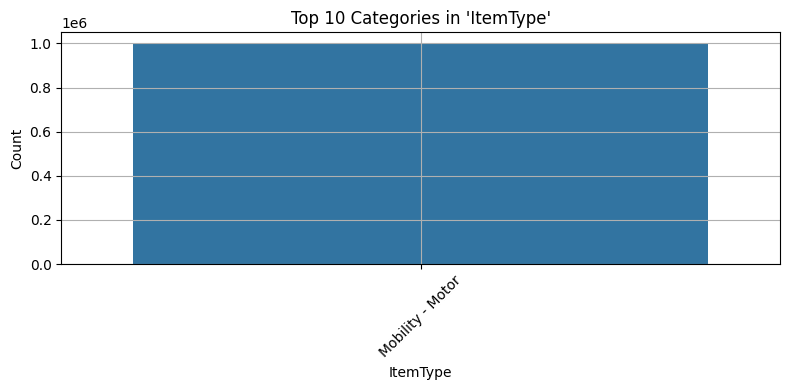

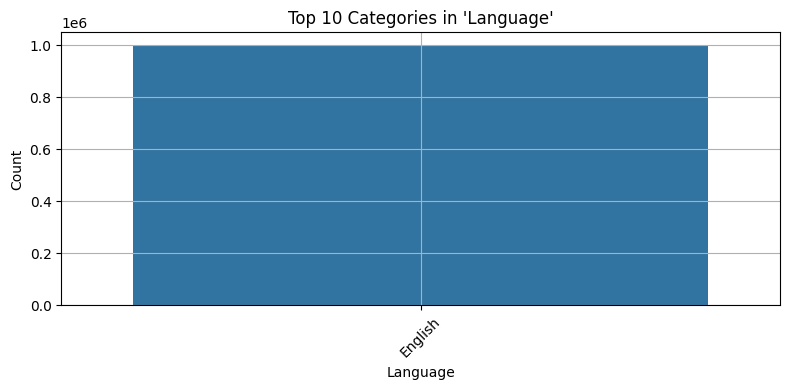

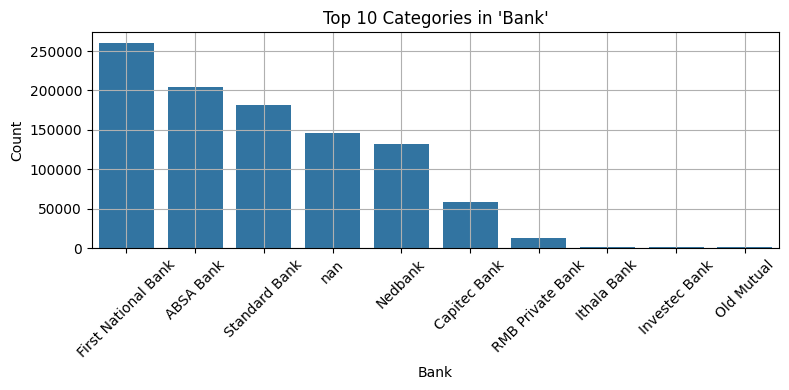

In [7]:
# Select numerical and categorical columns
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
categorical_cols = ['Province', 'Gender', 'ItemType', 'Language', 'Bank']

# Plot distributions
plot_numerical_distributions(df, numeric_cols)
plot_categorical_distributions(df, categorical_cols)

#### Bivariate Analysis

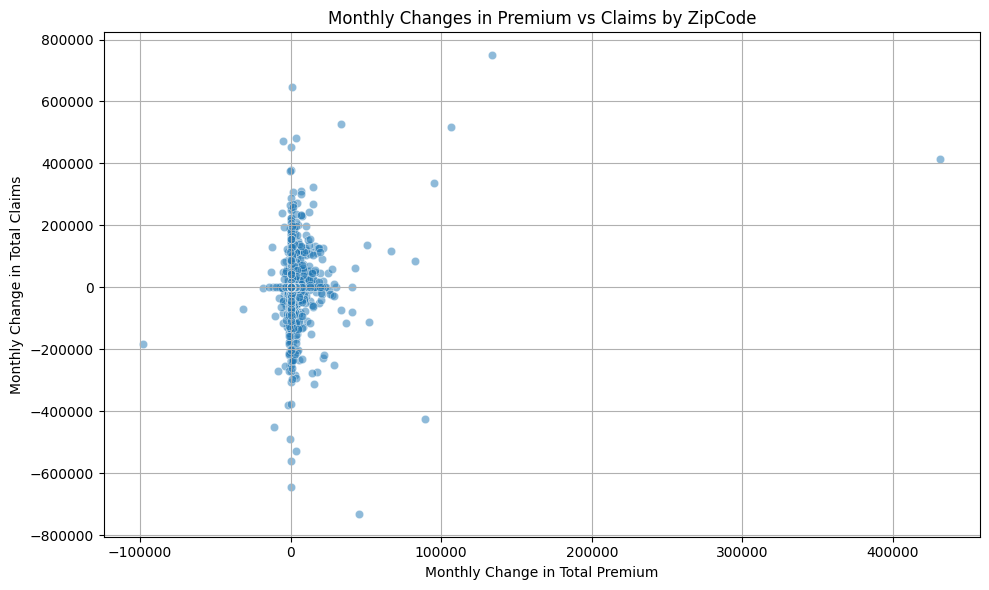

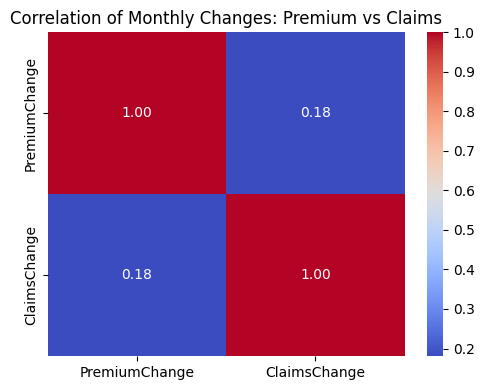

In [8]:
analyze_monthly_changes_by_zip(df) # Analyze premium and claims by ZIP code

#### Data Comparison

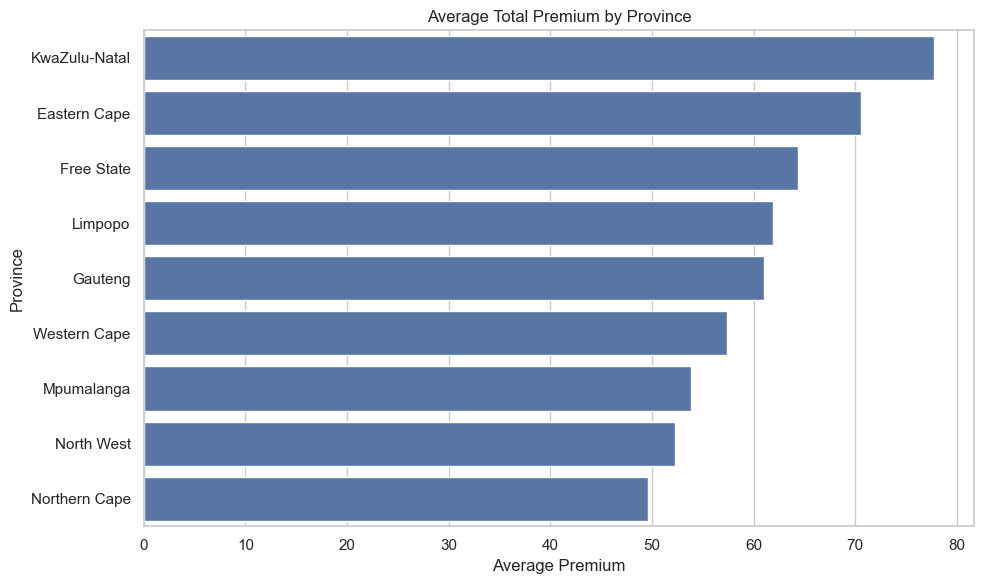

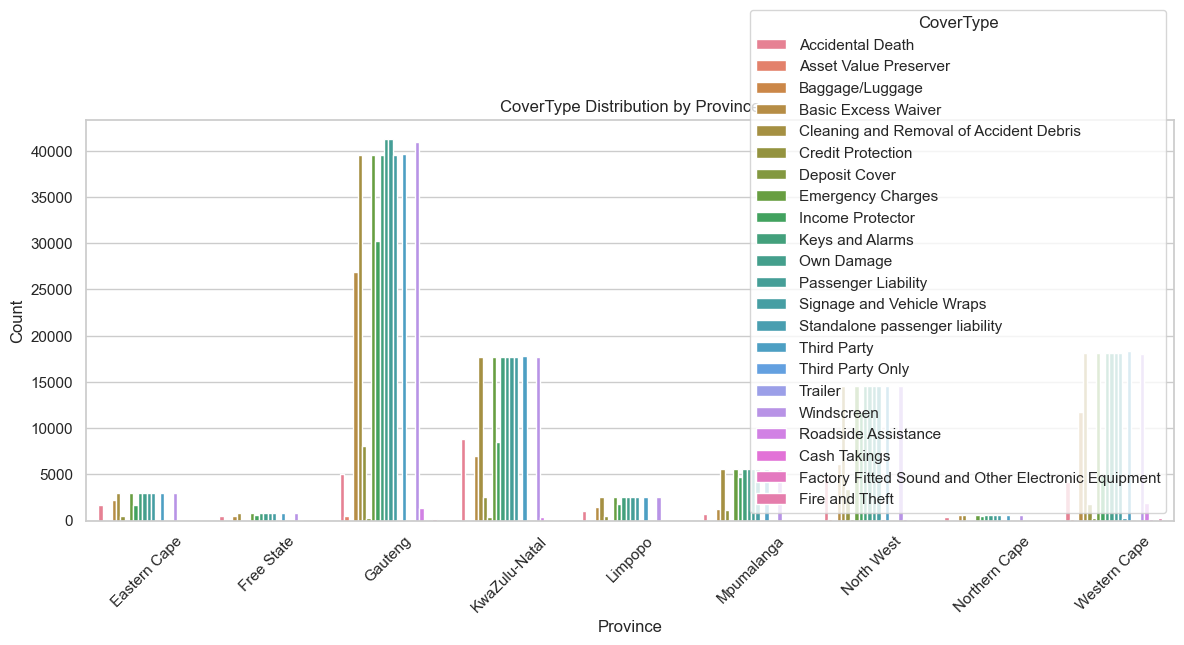

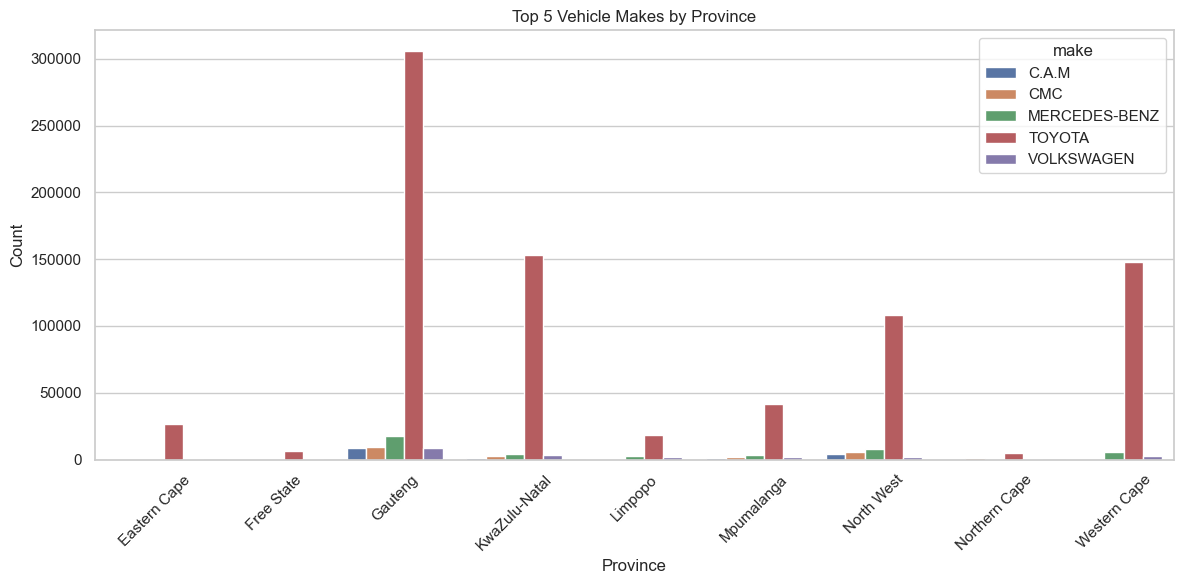

In [9]:
plot_geographic_trends(df)

#### Outlier Detection

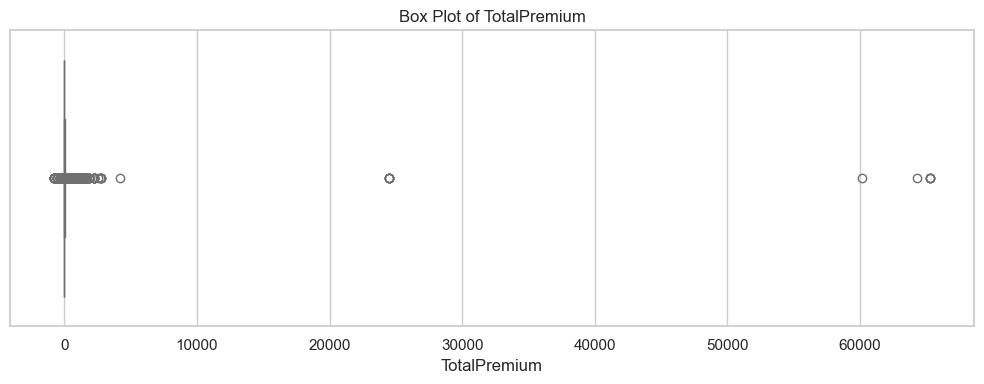

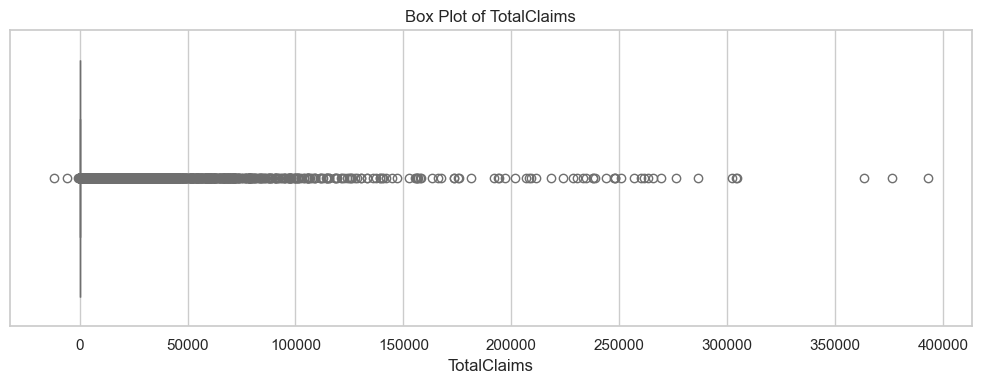

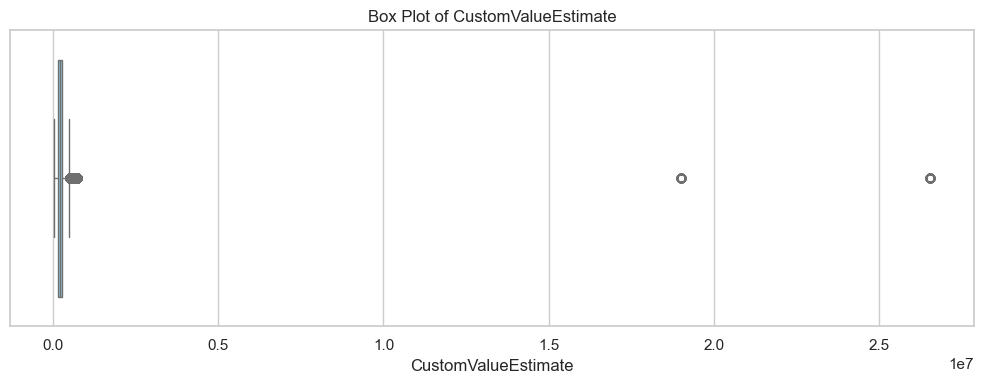

In [10]:
num_cols_to_check = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
plot_boxplots_for_numerical(df, num_cols_to_check)

#### Key insights gained

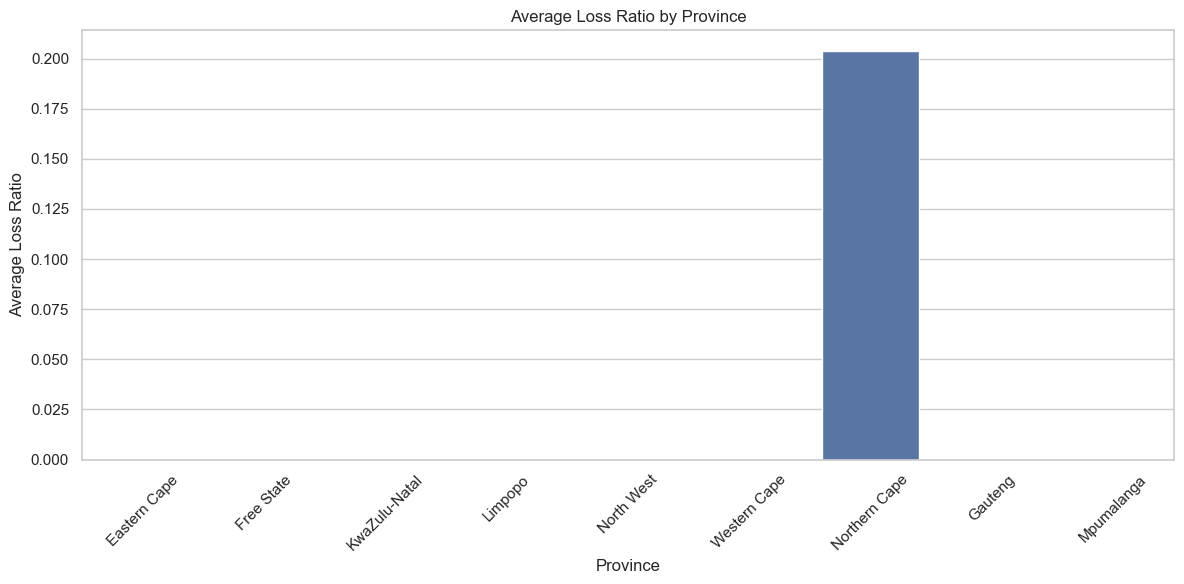

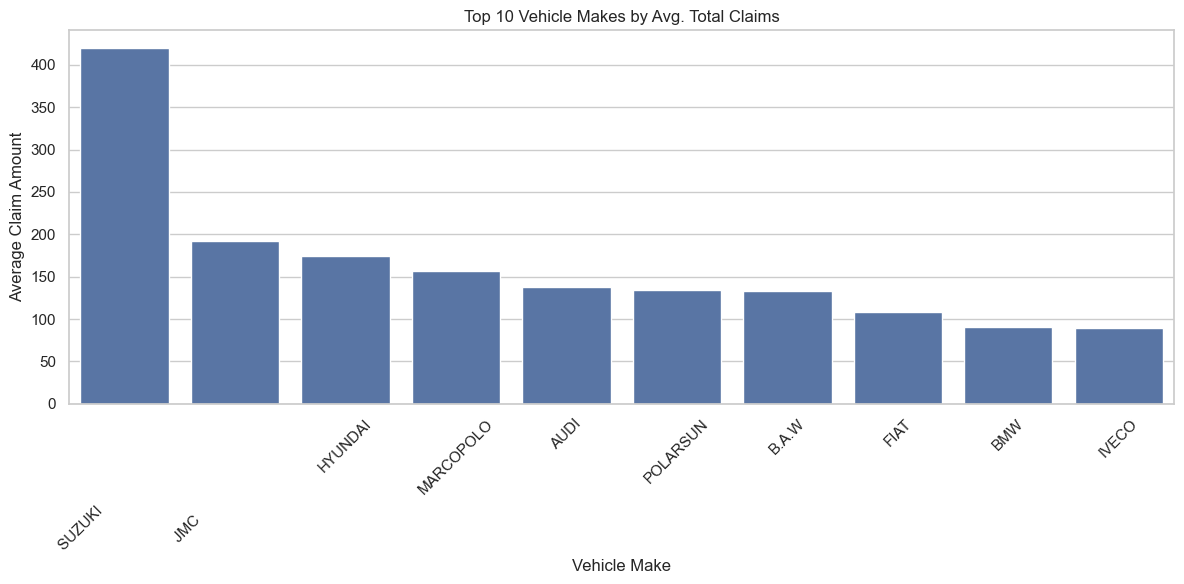

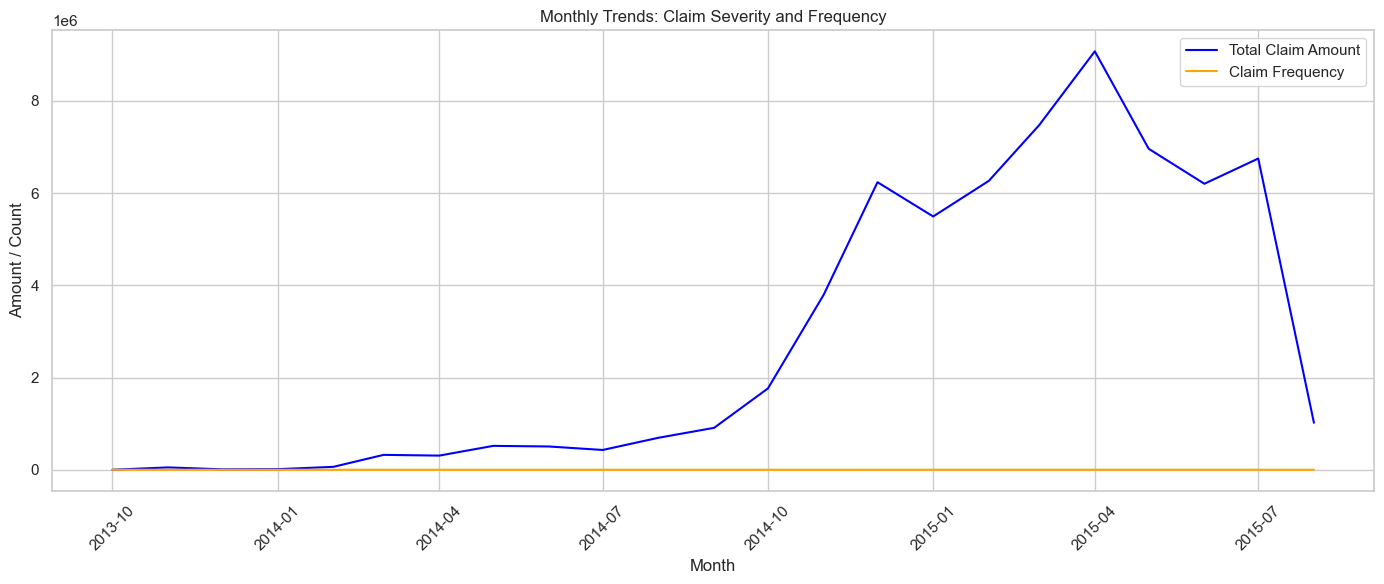

In [11]:
plot_loss_ratio_by_province(df)
plot_claims_by_vehicle_make(df, top_n=10)
plot_monthly_claim_trends(df)